<a href="https://colab.research.google.com/github/Mohamed-Maher5/The_Sparks_Foundation/blob/main/CharacterRecognation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedmaher5","key":"91a688556b6a9fab04173a86be148128"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download kdnishanth/characterrecognitionfromnumberplate

 82% 17.0M/20.7M [00:00<00:00, 26.9MB/s]
100% 20.7M/20.7M [00:01<00:00, 20.6MB/s]


In [ ]:
! unzip characterrecognitionfromnumberplate.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training Data/8/train_38_01630.png  
  inflating: Training Data/8/train_38_01631.png  
  inflating: Training Data/8/train_38_01632.png  
  inflating: Training Data/8/train_38_01633.png  
  inflating: Training Data/8/train_38_01634.png  
  inflating: Training Data/8/train_38_01635.png  
  inflating: Training Data/8/train_38_01636.png  
  inflating: Training Data/8/train_38_01637.png  
  inflating: Training Data/8/train_38_01638.png  
  inflating: Training Data/8/train_38_01639.png  
  inflating: Training Data/8/train_38_01640.png  
  inflating: Training Data/8/train_38_01641.png  
  inflating: Training Data/8/train_38_01642.png  
  inflating: Training Data/8/train_38_01643.png  
  inflating: Training Data/8/train_38_01644.png  
  inflating: Training Data/8/train_38_01645.png  
  inflating: Training Data/8/train_38_01646.png  
  inflating: Training Data/8/train_38_01647.png  
  inflating: Training Data/8/train_38_01648.png  

In [ ]:
import pandas as pd

train_path = '/content/Training_Data'
test_path = '/content/Testing_Data'

In [ ]:
## Labeling
codes = {'A' : 0, 'B' :1 , 'C' : 2, 'D' : 3, 'E' : 4,'F' : 5, 'G' : 6, 'H' : 7,  'I' : 8, 'J' : 9,  'K' : 10,  'L' :11,  'M' :12, 'N' :13, 'O' : 14, 'P' : 15,  'Q' : 16,  'R' :17,  'S' :18, 'T' :19, 'U' : 20, 'V' : 21,  'W' : 22,  'W' :23, 'Y' :24, 'Z' : 25}

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import glob as gb

sizes = []

def load_images_from_folders(base_folder, codes):
    images = []
    labels = []
    for label,code, in codes.items():
        folder_path = os.path.join(base_folder, 'class_' + label)
        files = gb.glob(pathname=str(folder_path+"/*.jpg"))
        for file in files :
          image = plt.imread(file)
          if image is not None:
            images.append(image)
            labels.append(code)
            sizes.append(image.shape)
    return images,labels,sizes

In [ ]:
train_images = load_images_from_folders(train_path, codes)
test_images = load_images_from_folders(test_path, codes)

In [ ]:
len(train_images[0]),len(test_images[0])

(600, 150)

In [ ]:
from collections import Counter

# Use Counter to count occurrences of each tuple
counts = Counter(sizes)

# Print the counts
for tpl, count in counts.items():
    print(f"Tuple {tpl}: {count} occurrences")

Tuple (28, 28, 3): 750 occurrences


In [ ]:
def resize_images(images, size=(224, 224)):
    resized_images = []
    for img in images:
        if img is not None:
            resized_img = cv2.resize(img, size)
            resized_images.append(resized_img)
        else:
            print("Skipping None image.")
    return resized_images

In [ ]:
train_images_resized = resize_images(train_images[0])
test_images_resized = resize_images(test_images[0])

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
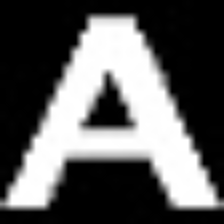

In [ ]:
train_images_resized[0]

In [ ]:
def augment_images(images, labels):
    augmented_images = []
    augmented_labels = []
    for img, label in zip(images, labels):
        flipped_img = cv2.flip(img, 1)  # Horizontal flip
        augmented_images.append(flipped_img)
        augmented_labels.append(label)
    return augmented_images, augmented_labels

In [ ]:
train_images_resized_aug = augment_images(train_images_resized, train_images[1])
test_images_resized_aug = augment_images(test_images_resized, test_images[1])

In [ ]:
train_images_resized = (train_images_resized, train_images[1])
test_images_resized = (test_images_resized, test_images[1])

In [ ]:
train_images = train_images_resized[0] + train_images_resized_aug[0]
train_labels = train_images_resized[1] + train_images_resized_aug[1]

test_images = test_images_resized[0] + test_images_resized_aug[0]
test_labels = test_images_resized[1] + test_images_resized_aug[1]

In [ ]:
images = train_images + test_images
labels = train_labels + test_labels

In [ ]:
def normalize_images(images):
    normalized_images = []
    for img in images:
        normalized_img = img / 255.0
        normalized_images.append(normalized_img)
    return normalized_images

In [ ]:
images = normalize_images(images)

In [ ]:
len(images),len(labels)

(1500, 1500)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_random_images(images, labels, num_images=16):
    # Get random indices
    random_indices = np.random.choice(len(images), size=num_images, replace=False)
    # Create subplots
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))

    # Plot each image with its label
    for i, idx in enumerate(random_indices):
        row = i // 4
        col = i % 4
        ax = axes[row, col]
        ax.imshow(images[idx])
        ax.set_title(f"Label: {labels[idx]}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

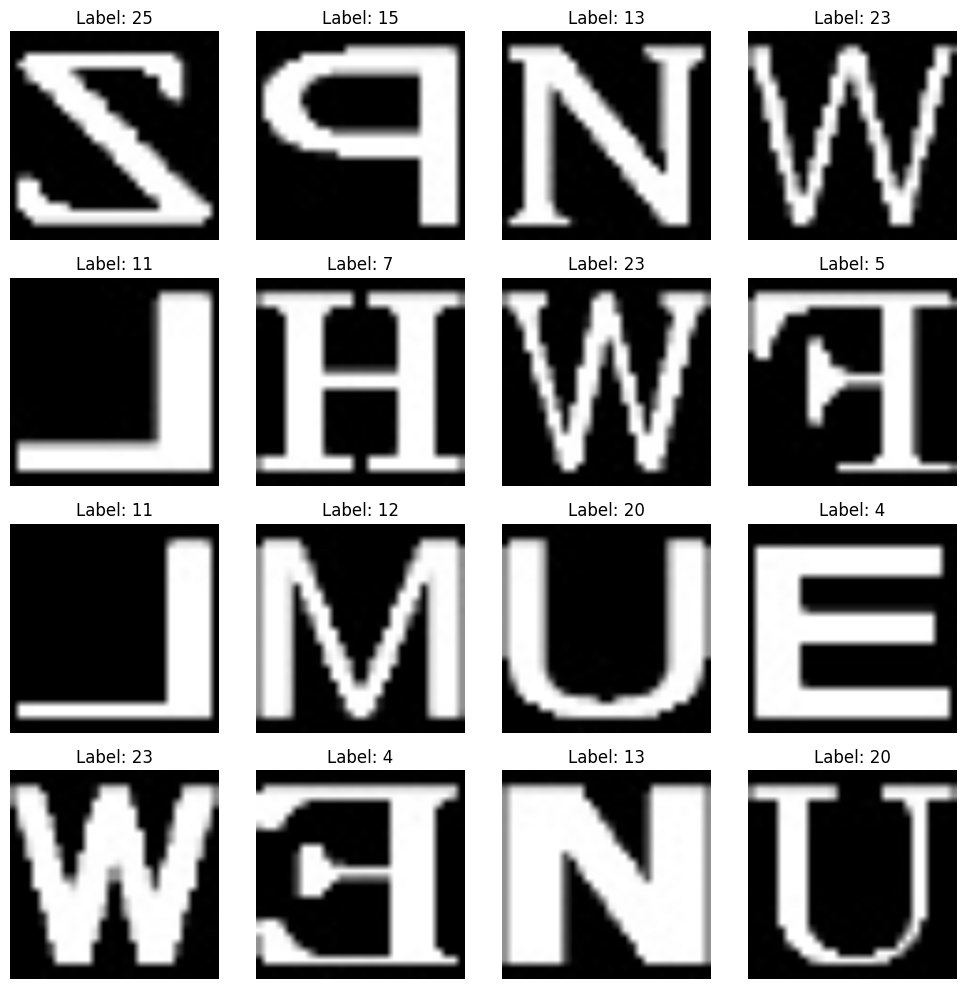

In [ ]:
show_random_images(images, labels)

In [ ]:
from sklearn.model_selection import train_test_split

images = np.array(images)

train_images, temp_images , train_labels , temp_labels = train_test_split(images, labels, test_size=0.3, random_state=42)
val_images, test_images , val_labels , test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=123)

In [ ]:
# Convert labels to integers if they are not already
train_labels = np.array([int(label) for label in train_labels])
val_labels = np.array([int(label) for label in val_labels])
test_labels = np.array([int(label) for label in test_labels])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define the model
model = Sequential([
    Flatten(input_shape=(224, 224, 3)),  # Flatten layer to convert the 3D image arrays into 1D
    Dense(128, activation='relu'),  # Dense hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),   # Dense hidden layer with 64 neurons and ReLU activation
    Dense(26, activation='softmax')  # Output layer with 26 neurons (assuming 26 classes) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',  # Adam optimizer
              loss='sparse_categorical_crossentropy',  # Sparse categorical crossentropy loss
              metrics=['accuracy'])  # Monitor accuracy during training

# Display model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               19267712  
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 26)                1690      
                                                                 
Total params: 19277658 (73.54 MB)
Trainable params: 19277658 (73.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))

Epoch 1/10
33/33 [==============================] - 18s 508ms/step - loss: 13.3547 - accuracy: 0.2714 - val_loss: 2.5403 - val_accuracy: 0.3511
Epoch 2/10
33/33 [==============================] - 15s 452ms/step - loss: 1.9104 - accuracy: 0.4629 - val_loss: 1.7185 - val_accuracy: 0.4400
Epoch 3/10
33/33 [==============================] - 17s 502ms/step - loss: 1.1993 - accuracy: 0.6295 - val_loss: 1.1918 - val_accuracy: 0.6622
Epoch 4/10
33/33 [==============================] - 16s 497ms/step - loss: 0.7547 - accuracy: 0.7714 - val_loss: 0.6246 - val_accuracy: 0.8578
Epoch 5/10
33/33 [==============================] - 16s 497ms/step - loss: 0.3939 - accuracy: 0.8905 - val_loss: 0.5166 - val_accuracy: 0.8844
Epoch 6/10
33/33 [==============================] - 17s 504ms/step - loss: 0.2166 - accuracy: 0.9476 - val_loss: 0.4216 - val_accuracy: 0.9022
Epoch 7/10
33/33 [==============================] - 14s 427ms/step - loss: 0.1448 - accuracy: 0.9629 - val_loss: 0.4385 - val_accuracy: 0.924

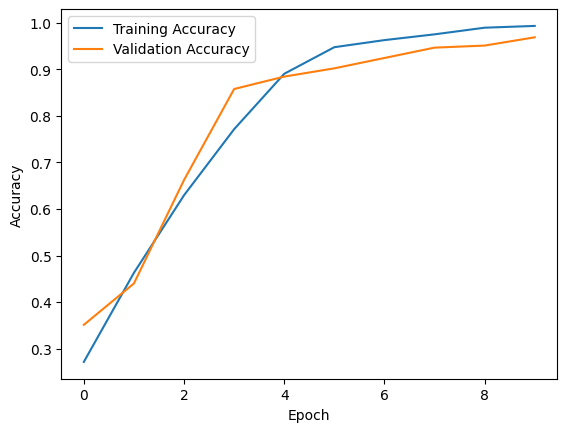

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy Curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

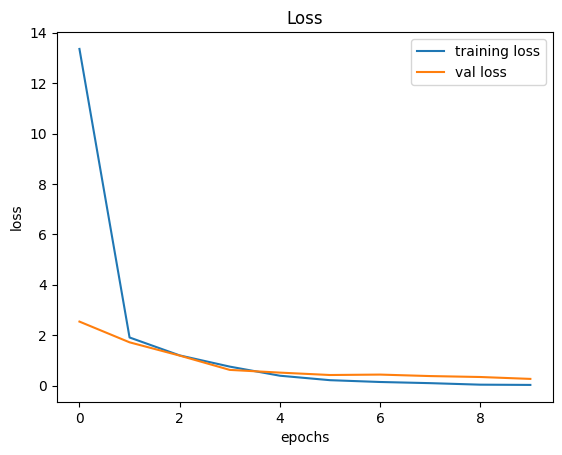

In [ ]:
## Plot Loss Curve
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels)
print("Test accuracy:", test_accuracy)

8/8 [==============================] - 0s 34ms/step - loss: 0.2811 - accuracy: 0.9644
Test accuracy: 0.9644444584846497


In [ ]:
predictions = model.predict(test_images)
prediction_labels = []

for prediction in predictions:
  prediction_labels.append(np.argmax(prediction))

8/8 [==============================] - 1s 65ms/step


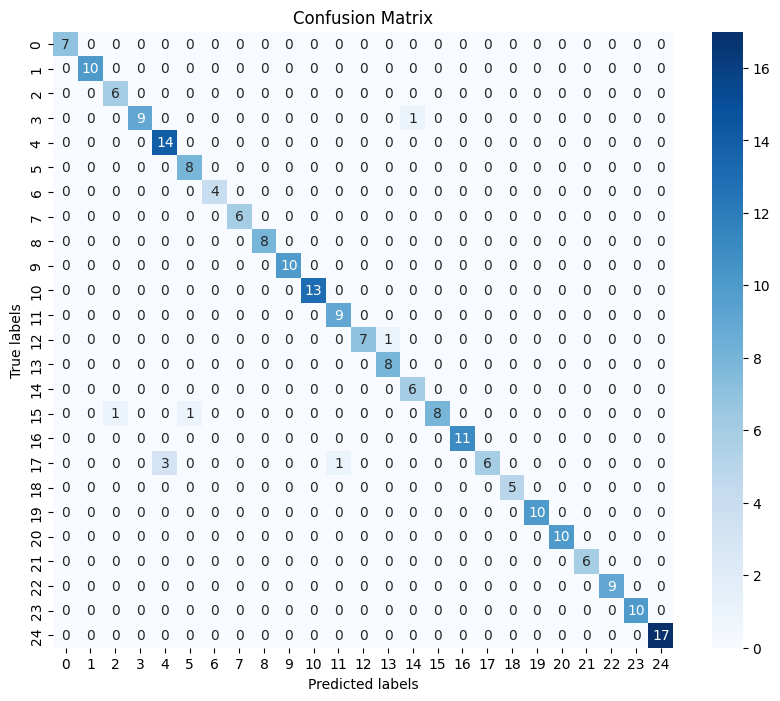

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(test_labels, prediction_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()